In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['NFLX', 'TSLA', 'FB', 'AMZN', 'MSFT', 'AAPL', 'GOOG', 'GOLD']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2019-01-03')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2019-01-03 to 2020-01-13
Data columns (total 8 columns):
NFLX    259 non-null float64
TSLA    259 non-null float64
FB      259 non-null float64
AMZN    259 non-null float64
MSFT    259 non-null float64
AAPL    259 non-null float64
GOOG    259 non-null float64
GOLD    259 non-null float64
dtypes: float64(8)
memory usage: 18.2 KB


In [4]:
mydata.head()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2019-01-03,271.200012,300.359985,131.740005,1500.280029,95.980820,140.085220,1016.059998,12.852815
2019-01-04,297.570007,317.690002,137.949997,1575.390015,100.444817,146.065353,1070.709961,12.941796
2019-01-07,315.339996,334.959991,138.050003,1629.510010,100.572922,145.740265,1068.390015,12.773721
2019-01-08,320.269989,335.350006,142.529999,1656.579956,101.302139,148.518509,1076.280029,12.200287
2019-01-09,319.959991,338.529999,144.229996,1659.420044,102.750717,151.040604,1074.660034,12.309041


In [5]:
mydata.tail()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2020-01-07,330.750000,469.059998,213.059998,1906.859985,157.580002,298.390015,1393.339966,18.469999
2020-01-08,339.260010,492.140015,215.220001,1891.969971,160.089996,303.190002,1404.319946,17.820000
2020-01-09,335.660004,481.339996,218.300003,1901.050049,162.089996,309.630005,1419.829956,17.600000
2020-01-10,329.049988,478.149994,218.059998,1883.160034,161.339996,310.329987,1429.729980,17.850000
2020-01-13,339.649994,516.169983,221.509995,1895.250244,162.410095,312.469910,1437.130005,17.620001


In [6]:
mydata.iloc[0]

NFLX     271.200012
TSLA     300.359985
FB       131.740005
AMZN    1500.280029
MSFT      95.980820
AAPL     140.085220
GOOG    1016.059998
GOLD      12.852815
Name: 2019-01-03 00:00:00, dtype: float64

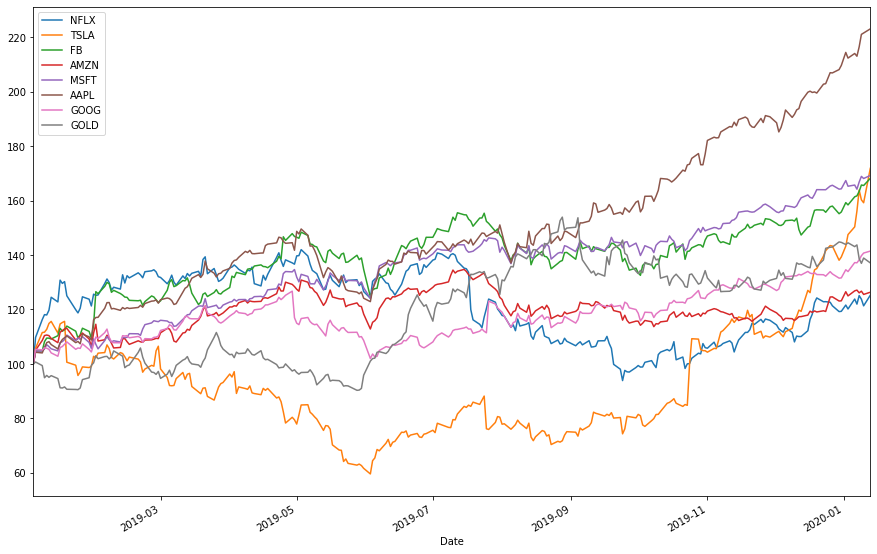

In [7]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,10));
plt.legend()
plt.show()

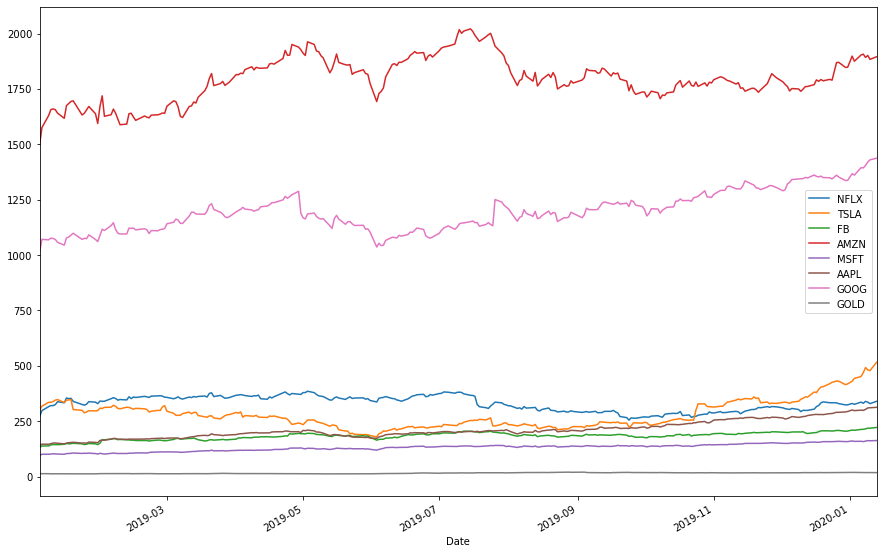

In [8]:
mydata.plot(figsize=(15,10))
plt.show()

In [9]:
mydata.iloc[0]

NFLX     271.200012
TSLA     300.359985
FB       131.740005
AMZN    1500.280029
MSFT      95.980820
AAPL     140.085220
GOOG    1016.059998
GOLD      12.852815
Name: 2019-01-03 00:00:00, dtype: float64

In [10]:
returns = (mydata / mydata.shift(1)) - 1

In [11]:
returns.head()

,NFLX,TSLA,FB,AMZN,MSFT,AAPL,GOOG,GOLD
Date,,,,,,,,
2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,0.097234,0.057697,0.047138,0.050064,0.046509,0.042689,0.053786,0.006923
2019-01-07,0.059717,0.054361,0.000725,0.034353,0.001275,-0.002226,-0.002167,-0.012987
2019-01-08,0.015634,0.001164,0.032452,0.016612,0.007251,0.019063,0.007385,-0.044892
2019-01-09,-0.000968,0.009483,0.011927,0.001714,0.014300,0.016982,-0.001505,0.008914


In [12]:
weights = np.array([0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

NFLX    0.277802
TSLA    0.645767
FB      0.540814
AMZN    0.251895
MSFT    0.528868
AAPL    0.806965
GOOG    0.364293
GOLD    0.353450
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.47123169189311725

In [15]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 4) *100) + '%'
print(pfolio_1)

47.12%


In [16]:
weights_2 = np.array([0.208,0.145,0.124,0.114,0.108,0.103,0.100,0.098])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 4) *100) + '%'
print('Portifolio 1: ',pfolio_1)
print('Portifolio 2: ',pfolio_2)

Portifolio 1:  47.12%
Portifolio 2:  45.85%
